In [69]:
# LSTM ?
# RNN ?
# find and load the data
# closing price
# how much price move with previos and current closing price
# fit with previous candle to current
# closing price

# --------------------------------------------------------------------
# Bitcoin price prediction
# 1. Find dataset with bitcoin price
# 2. Show Bitcoin chart
# 3. Convert data into Keras data format to feed model
# 4. devide data for train and test in a special way get data which is last month old for testing to know how accurate model is
# 5. difference beetween price???
# 6. try with standart metrix



In [70]:
import yfinance as yf

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split


In [88]:
# 1. Find dataset with bitcoin price

# Завантажуємо дані Bitcoin (BTC-USD — біткоїн до долара)
data = yf.download('BTC-USD', start='2020-01-01', end="2025-10-10", interval='1d')
data_test = yf.download('BTC-USD', start='2025-01-10', interval='1d')

# Переглядаємо перші рядки
print(data.head())
print(data.tail())


C:\Users\Denys\AppData\Local\Temp\ipykernel_7516\4191736357.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD', start='2020-01-01', end="2025-10-10", interval='1d')
[*********************100%***********************]  1 of 1 completed
C:\Users\Denys\AppData\Local\Temp\ipykernel_7516\4191736357.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_test = yf.download('BTC-USD', start='2025-01-10', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2025-10-05  123513.476562  125559.210938  122191.960938  122419.671875   
2025-10-06  124752.531250  126198.070312  123196.046875  123510.453125   
2025-10-07  121451.382

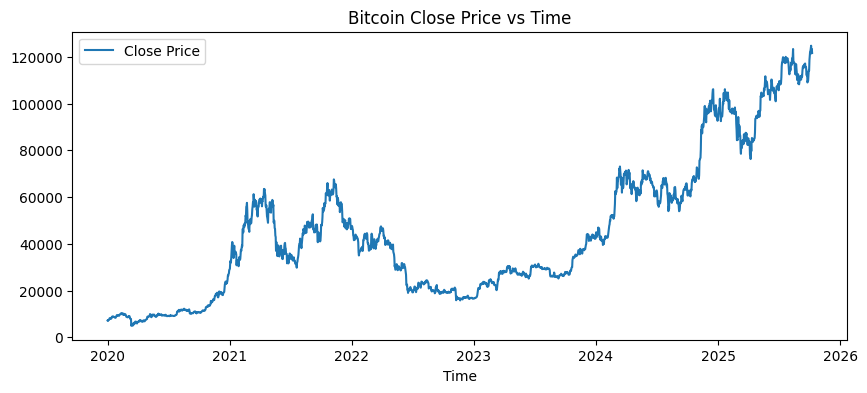

In [72]:
# 2. Show Bitcoin chart
plt.figure(figsize=(10,4))
plt.plot(data["Close"], label='Close Price')
plt.legend()
plt.title("Bitcoin Close Price vs Time")
plt.xlabel("Time")
plt.show()

In [86]:
# 3. Convert data into Keras data format to feed model

def make_dataset(series, seq_len=50, step=1):
    X, y = [], []
    for i in range(0, len(series) - seq_len, step):
        X.append(series[i:i+seq_len])
        y.append(series[i+seq_len])
    X = np.array(X)
    y = np.array(y)

    print(X.shape)
    # LSTM в Keras очікує форму (samples, timesteps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y


In [89]:

seq_len = 50

np_data = np.asarray(data["Close"])

#X, y = make_dataset(np_data, seq_len=seq_len)



#print(X.shape)

[[ 94701.453125 ]
 [ 94566.59375  ]
 [ 94488.4375   ]
 [ 94516.5234375]
 [ 96534.046875 ]
 [100504.4921875]
 [ 99756.90625  ]
 [104462.0390625]
 [104408.0703125]
 [101089.609375 ]
 [102016.6640625]
 [106146.265625 ]
 [103653.0703125]
 [103960.171875 ]
 [104819.484375 ]
 [104714.6484375]
 [102682.5      ]
 [102087.6875   ]
 [101332.4765625]
 [103703.2109375]
 [104735.3046875]
 [102405.0234375]
 [100655.90625  ]
 [ 97688.9765625]
 [101405.421875 ]
 [ 97871.8203125]
 [ 96615.4453125]
 [ 96593.296875 ]
 [ 96529.0859375]
 [ 96482.453125 ]
 [ 96500.09375  ]
 [ 97437.5546875]
 [ 95747.4296875]
 [ 97885.859375 ]
 [ 96623.8671875]
 [ 97508.96875  ]
 [ 97580.3515625]
 [ 96175.03125  ]
 [ 95773.3828125]
 [ 95539.546875 ]
 [ 96635.609375 ]
 [ 98333.9375   ]
 [ 96125.546875 ]
 [ 96577.7578125]
 [ 96273.921875 ]
 [ 91418.171875 ]
 [ 88736.171875 ]
 [ 84347.0234375]
 [ 84704.2265625]
 [ 84373.0078125]
 [ 86031.9140625]
 [ 94248.3515625]
 [ 86065.671875 ]
 [ 87222.1953125]
 [ 90623.5625   ]
 [ 89961.7

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1647, 50, 1)
(412, 50, 1)


In [59]:
# 4) Побудова моделі
model = models.Sequential([
    layers.Input(shape=(seq_len, 1)),
    layers.LSTM(64, return_sequences=False),  # 64 прихованих одиниць
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # прогноз — одне значення
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    #validation_data=(X_val, y_val)
)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2.0816e-04 - mae: 0.0087
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.5095e-06 - mae: 0.0021
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.8023e-06 - mae: 0.0020
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.6240e-06 - mae: 0.0020
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.4179e-06 - mae: 0.0022
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.7027e-06 - mae: 0.0021
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.8858e-06 - mae: 0.0021
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.1677e-06 - mae: 0.0021
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.4304e-06 - mae: 0.0018
Epoch 10/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.1639e-06 - mae: 0.0018
Epoch 11/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.0931e-06 - mae: 0.0020
Epoch 12/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.8165e-06 - m

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2839e-06 - mae: 0.0014
Test MSE: 0.00000, Test MAE: 0.00141
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


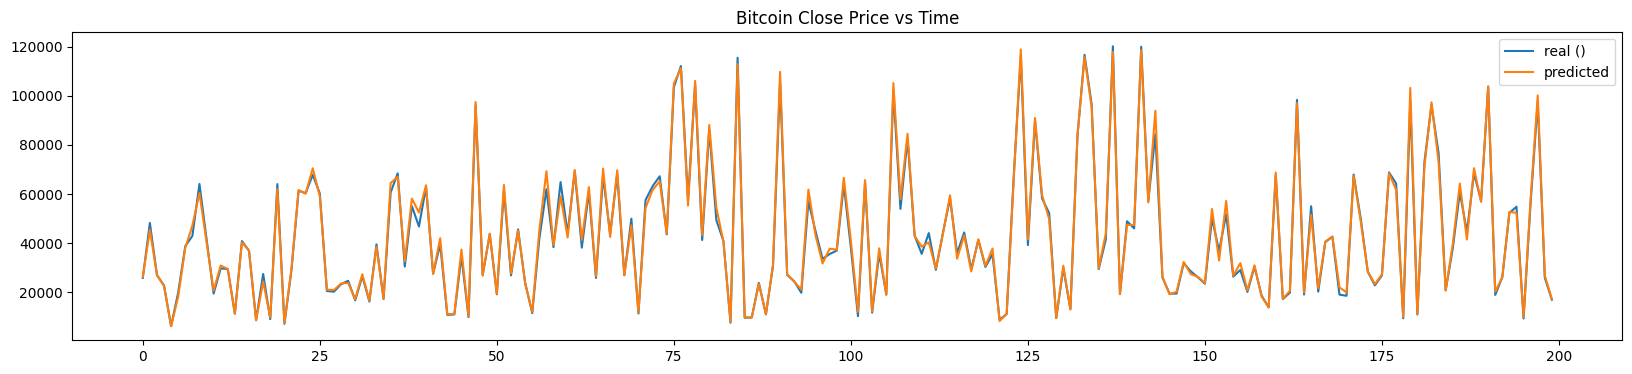

In [61]:
# 6) Оцінка та прогноз
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_loss:.5f}, Test MAE: {test_mae:.5f}")

# Робимо прогноз на тестовій частині
y_pred = model.predict(X_test).flatten()

# 7) Візуалізація: частина справжніх та прогноз
plt.figure(figsize=(20, 4))
plt.plot(y_test[:200] * 1000000, label='real ()')
plt.plot(y_pred[:200] * 1000000, label='predicted')
plt.legend()
plt.title("Bitcoin Close Price vs Time")
plt.show()

In [90]:

np_data_test = np.asarray(data_test["Close"])
np_data_test = np_data_test / 1000000

X_t, y_t = make_dataset(np_data_test, seq_len=seq_len)


[[0.09470145]
 [0.09456659]
 [0.09448844]
 [0.09451652]
 [0.09653405]
 [0.10050449]
 [0.09975691]
 [0.10446204]
 [0.10440807]
 [0.10108961]
 [0.10201666]
 [0.10614627]
 [0.10365307]
 [0.10396017]
 [0.10481948]
 [0.10471465]
 [0.1026825 ]
 [0.10208769]
 [0.10133248]
 [0.10370321]
 [0.1047353 ]
 [0.10240502]
 [0.10065591]
 [0.09768898]
 [0.10140542]
 [0.09787182]
 [0.09661545]
 [0.0965933 ]
 [0.09652909]
 [0.09648245]
 [0.09650009]
 [0.09743755]
 [0.09574743]
 [0.09788586]
 [0.09662387]
 [0.09750897]
 [0.09758035]
 [0.09617503]
 [0.09577338]
 [0.09553955]
 [0.09663561]
 [0.09833394]
 [0.09612555]
 [0.09657776]
 [0.09627392]
 [0.09141817]
 [0.08873617]
 [0.08434702]
 [0.08470423]
 [0.08437301]
 [0.08603191]
 [0.09424835]
 [0.08606567]
 [0.0872222 ]
 [0.09062356]
 [0.08996173]
 [0.08674267]
 [0.08615459]
 [0.08060104]
 [0.078532  ]
 [0.08286221]
 [0.08372236]
 [0.0810667 ]
 [0.0839691 ]
 [0.08434311]
 [0.08257969]
 [0.08407569]
 [0.0827185 ]
 [0.08685423]
 [0.0841672 ]
 [0.08404324]
 [0.08

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.0221e-06 - mae: 0.0022
Test MSE: 0.00001, Test MAE: 0.00215
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


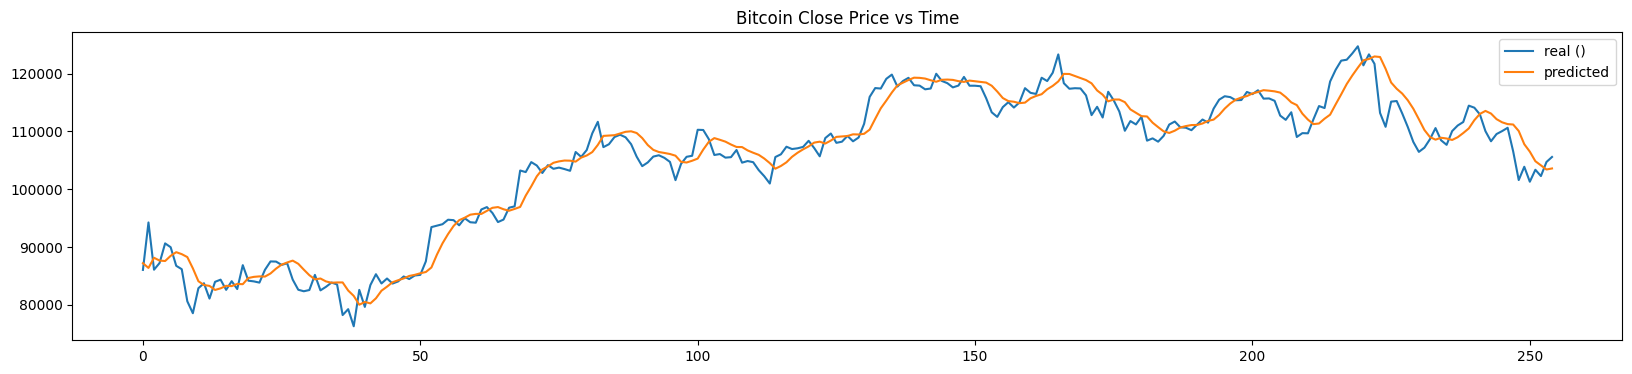

In [92]:
# 6) Оцінка та прогноз
test_loss, test_mae = model.evaluate(X_t, y_t)
print(f"Test MSE: {test_loss:.5f}, Test MAE: {test_mae:.5f}")

# Робимо прогноз на тестовій частині
y_pred = model.predict(X_t).flatten()

# 7) Візуалізація: частина справжніх та прогноз
plt.figure(figsize=(20, 4))
plt.plot(y_t * 1000000, label='real ()')
plt.plot(y_pred * 1000000, label='predicted')
plt.legend()
plt.title("Bitcoin Close Price vs Time")
plt.show()

In [ ]:
data_test["Predicted Price"] =

Test MSE: 0.00001, Test MAE: 0.00215
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\Denys\AppData\Local\Temp\ipykernel_7516\2975853237.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Denys\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


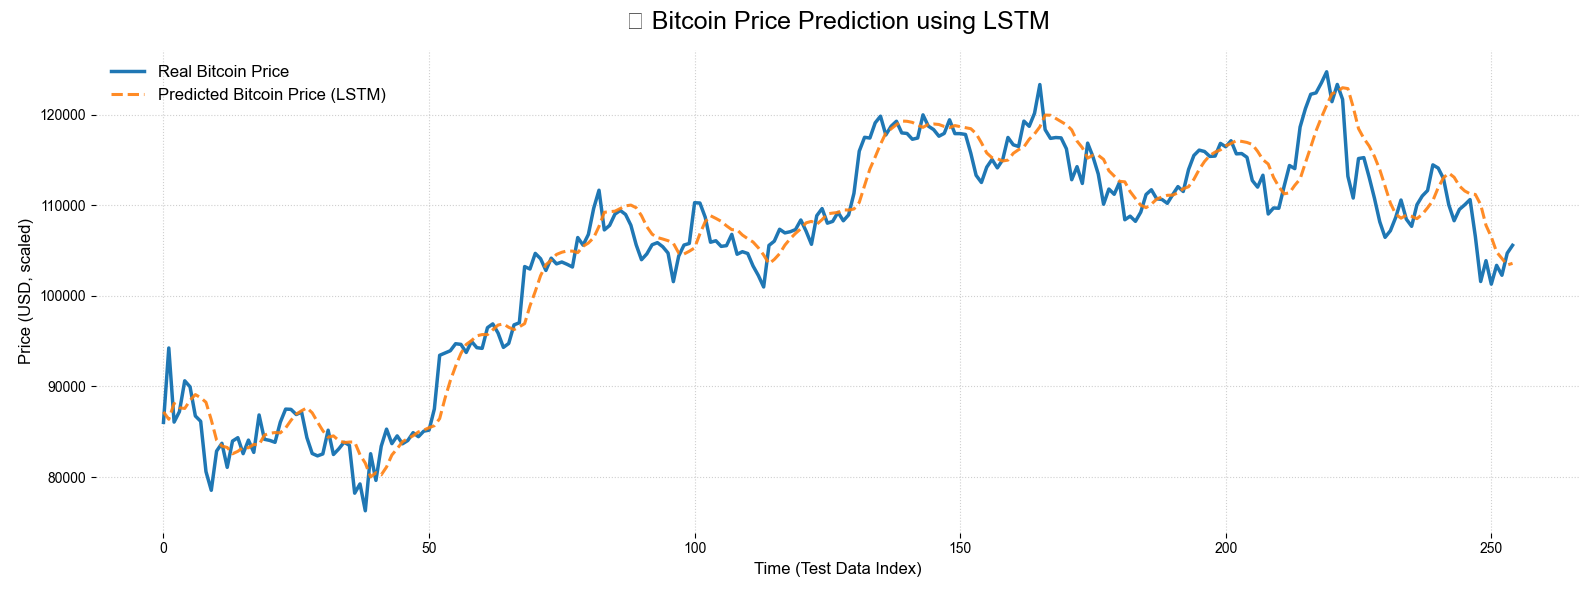

In [93]:
# 6) Оцінка та прогноз
test_loss, test_mae = model.evaluate(X_t, y_t, verbose=0)
print(f"Test MSE: {test_loss:.5f}, Test MAE: {test_mae:.5f}")

# Прогноз на тестовій частині
y_pred = model.predict(X_t).flatten()

# 7) Візуалізація: реальні vs передбачені
plt.figure(figsize=(16, 6))

# Основна лінія — реальні дані
plt.plot(y_t * 1_000_000,
         label='Real Bitcoin Price',
         color='#1f77b4',
         linewidth=2.5)

# Передбачення — пунктиром, напівпрозорим кольором
plt.plot(y_pred * 1_000_000,
         label='Predicted Bitcoin Price (LSTM)',
         color='#ff7f0e',
         linestyle='--',
         linewidth=2.2,
         alpha=0.9)

# Візуальні покращення
plt.title("📈 Bitcoin Price Prediction using LSTM", fontsize=18, pad=15)
plt.xlabel("Time (Test Data Index)", fontsize=12)
plt.ylabel("Price (USD, scaled)", fontsize=12)
plt.legend(fontsize=12, frameon=False)
plt.grid(True, linestyle=':', alpha=0.6)

# Згладжені межі, мінімалістичний стиль
plt.tight_layout()
plt.style.use('seaborn-v0_8-whitegrid')

# Тонкі рамки і акуратні осі
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()